# Math 425 Computation Linear Algebra
## HW3, Part A

### Brent A. Thorne

brentathorne@gmail.com

##### Uniqueness, linear transformations, range and domain.

In [1]:
# environment setup, try to make it clear which library I'm using for what
import numpy as np  # nice arrays and other stuff
import sympy as sym # symbollic maths 
from sympy.matrices import Matrix # pretty matrices
from sympy import Eq # pretty equations
from sympy.physics.quantum.dagger import Dagger # we'll want this later...
from math import e, pi, sqrt # Mathy math math
from mpl_toolkits.mplot3d import Axes3D # we like 3d quivers for tutorials
import matplotlib.pyplot as plt # old standby for plotting like a villian
from IPython.display import display, Math, Latex # used to display formatted results in the console
sym.init_printing()  # initialize pretty printing

### 1. Let $T({\bf x}) = A{\bf x}$. If  $A=\begin{bmatrix}1 & -3 & ~~2\\0 & ~~1 & -4\\3 & -5 & -9\end{bmatrix}$, and ${\bf b} = \begin{bmatrix}~~6\\ -7 \\ -9 \end{bmatrix}$, find a vector ${\bf x}$ whose image under $T$ is ${\bf b}$, and determine whether ${\bf x}$ is unique.

In [2]:
# "We are Legion. We do not forgive. We do not forget. Expect us." -Anonymous
A = Matrix([[1,-3,2],[0,1,-4],[3,-5,-9]])
b = Matrix([6,-7,-9])
x1,x2,x3 = sym.symbols('x1 x2 x3')
X = Matrix([x1,x2,x3])
x, = sym.linsolve((A,b), (x1,x2,x3)) # ',' represents sequence unpacking in python, somewhat abstract usage here

eq = Eq(A * X, b)  # flex on sympy
display(Latex(f'$Ax=b = {sym.latex(eq)}$')) 
display(Latex(f'$x={sym.latex(Matrix(x))}$ *$x$ is a solution, but is it unique?'))

Au = A.col_insert(3, b)  # Ought to make this a function, but I bet there's a reason this isn't builtin already...
display(Latex(f'$Au={sym.latex(Au)}$, $Au.rref()={sym.latex(Au.rref(pivots=False))}$ **'))
display(Latex('**The full rank indicates that there are no free variables and \
being a consistant system, this is indeed a unique solution.'))
display(Latex(f"\
$Au.nullspace()={sym.latex(Au.nullspace())}$ \
***note homogeneous nature of the nullspace.")) # become a Nullspace Cadet

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 2. Let $A=\begin{bmatrix}~~1 & 3 & 9 & ~~2\\~~1 & 0 & 3 & -4\\~~0 & 1 & 2 & ~~3\\-2 & 3 & 0 & ~~5\end{bmatrix}$ and ${\bf b} = \begin{bmatrix} -1 \\ ~~3 \\ -1 \\ ~~4 \end{bmatrix}$. Is ${\bf b}$ in the range of the linear transformation $T({\bf x}) = A{\bf x} $ ?

In [3]:
x1,x2,x3 = sym.symbols('x1 x2 x3')
x = Matrix([x1,x2,x3])
A = Matrix([[1,3,9,2],[1,0,3,-4],[0,1,2,3],[-2,3,0,5]])
b = Matrix([-1,3,-1,4])
Au = A.col_insert(4, b)
display(Latex(f'$A={sym.latex(A)}$, \
$A.rref()={sym.latex(A.rref(pivots=False))}$,\
$A.rank()={sym.latex(A.rank())}$, \
*not a fully ranked system'))
display(Latex(f'$Au={sym.latex(Au)}$, \
$Au.rref()={sym.latex(Au.rref(pivots=False))}$, \
$Au.rank()={sym.latex(Au.rank())}$, \
**'))

display(Latex('**The augmented rank indicates that there are is a free variable which is fine, \
just means the solution is not unique, \
however being an iconsistant system we can clearly see $b$ is NOT in the $span$ of $A$.  \
I suppose we might consider $\overrightarrow{\mathbb{0}}$ to be a unique, albeit trival solution, but that is just being weird.'))

display(Latex(f"\
$Ax=b$, ${sym.latex(A)}{sym.latex(x)}={sym.latex(b)}$, \
$x={sym.latex(sym.linsolve((A,b), (x1,x2,x3)))}$ \
*indeed, sympy confirms that only the trivial solution."))

display(Latex(f"Let's check the nullspace of our augmented matrix: \
$Au.nullspace()={sym.latex(Au.nullspace())}$ \
*nonhomogeneous nullspace further confirms $b$ in not in the range of $Ax$")) # Nonhomogeneous Nullspace Cowboy

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 3. Let $T : {\Bbb R}^n \rightarrow {\Bbb R}^m$ be a linear transformation, and let $\left\{ {\bf v}_1, {\bf v}_2, {\bf v_3} \right \}$ be a linearly dependent set in ${\Bbb R}^n$. Explain why the set $\left\{ T({\bf v}_1), T({\bf v}_2), T({\bf v_3}) \right \}$ is linearly dependent.

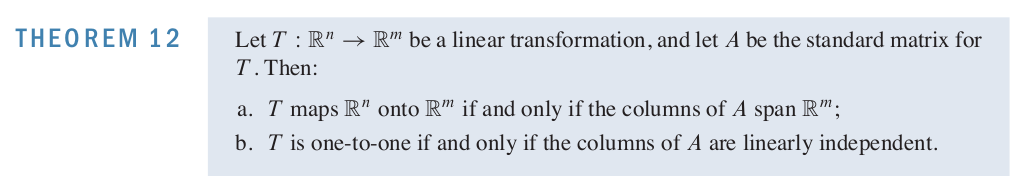
Statement (a) in Theorem 12 is equivalent to the statement “T maps $\mathbb{R^n}$ onto $\mathbb{R^m}$
if and only if every vector in $\mathbb{R^m}$ is a linear combination of the columns of A.”
*Theorem12 and Text, excerpt from Lay's "Linear Algebra and It's Applicaitons"

The point being that linear combinations in $\mathbb{R^n}$ map onto $\mathbb{R^m}$, iff the columns of $A$ $span$ $\mathbb{R^m}$, however the columns don't even $span$ $\mathbb{R^n}$ so mapping, onto or not, $\mathbb{R^m}$ is also dependent.  There's propably a more mathy way to say this but let's call this a 'point and grunt' proof.

### 4. Consider a linear transformation from $T : {\Bbb R}^3 \rightarrow {\Bbb R}^2$, where $T\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} = \begin{bmatrix} 7 \\ 11 \end{bmatrix}, T\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 6 \\ 9 \end{bmatrix}, \text{and } T\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -13\\~~17\end{bmatrix}.$ 

### Find the standard matrix $A$ of the transformation $T$.

In [4]:
e1 = Matrix([1,0,0])
e2 = Matrix([0,1,0])
e3 = Matrix([0,0,1])
e = Matrix([e1.T,e2.T,e3.T]).T # our basis for R**3
A = Matrix([[7,6,-13],[11,9,17]])  # just write it out for R**2

display(Latex(f'$A=[T(e1),T(e2),T(e3)]$'))
display(Latex(f'$A=[T({sym.latex(e1)},T({sym.latex(e2)},T({sym.latex(e3)}]$'))
display(Latex(f'Thus our standard matrix of $A$ is ${sym.latex(A)}$'))

display(Latex(f' \
    $A{sym.latex(e1)}={sym.latex(A*e1)}$, \
    $A{sym.latex(e2)}={sym.latex(A*e2)}$, \
    $A{sym.latex(e3)}={sym.latex(A*e3)}$ *Checks out!!'\
)) #A*e1, A*e2, A*e3, # looks good

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 5. Let $T: {\Bbb R}^2 \rightarrow {\Bbb R}^3$ be a linear transformation such that 
### $T(x_1,x_2) = (x_1-2x_2,-x_1+3x_2,3x_1-2x_2).$ 

### Find ${\bf x}$ such that $T({\bf x}) = (-1,4,9).$

In [5]:
x1,x2 = sym.symbols('x1 x2')
x = Matrix([x1,x2])
A = Matrix([[1,-2],[-1,3],[3,-2]])
b = Matrix([-1,4,9])
display(Latex(f'$A=[T(x1),T(x2)]$, *$A$ not $Ax$, right? think about this...'))
# let's be rather verbose here and show unity of the trinity
display(Latex(f' \
    $Ax={sym.latex(A)}*{sym.latex(x)}={sym.latex(A*x)}$ \
    * yes, that looks about right '))

X, = sym.linsolve((A,b), (x1,x2)) # ',' represents sequence unpacking in python
x = Matrix(X)

#display(Latex(f'$A={sym.latex(A)}$, $x={sym.latex(x)}$'))
display(Latex(f'\
    example: $Ax={sym.latex(A)}{sym.latex(x)}$ = ${sym.latex(A*x)}$ \
    *indeed, $x={sym.latex(x)}$, checks out ')) # develop usage of line continuaton for aesthetic purposes

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 6. Find the standard matrix for the linear transformation $T: {\Bbb R}^2 \rightarrow {\Bbb R}^2$
### which is a horizontal shear transformation that leaves ${\bf e}_1$ unchanged and maps
### ${\bf e}_2$ into ${\bf e}_2 + 3{\bf e}_1 $.

In [6]:
e1 = Matrix([1,0])
e2 = Matrix([0,1])
A = Matrix([[1,0],[3,1]]) # nope, that's not what the problems is asking... I have a mind like a steel Hermition Matrix; transposed and conjugated.
A= Matrix([[1,3],[0,1]])  # really? okay sure
x1,x2=sym.symbols('x1 x2')
x=Matrix([x1,x2])
display(Latex(f'$A={sym.latex(A)}$'))
display(Latex(f'example: $Ax={sym.latex(A)}{sym.latex(x)}$ = ${sym.latex(A*x)}$ *okay, not what I expected'))
display(Latex(f'$A{sym.latex(e1)}={sym.latex(A*e1)}$, $A{sym.latex(e2)}={sym.latex(A*e2)}$ *Checks out!!'))
display(Latex('Indeed, I have learned something today.'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### 7. The color of light can be represented in a vector $\begin{bmatrix} R \\ G \\ B \end{bmatrix}$ where $R = \text{amount of red}$, $G = \text{amount of green}$, and $B = \text{amount of blue}$. 
### The human eye and the brain transform the incoming signal into the signal $\begin{bmatrix} I \\ L \\ S\end{bmatrix}$, 
### where \begin{matrix}\text{      intensity} & I & = & \frac{R+G+B}{3}\\\text{long-wave signal} & L & = & R - G \\\text{short-wave signal} & S & =& B - \frac{R+G}{2}.\end{matrix}

#### (a) Find the matrix $P$ representing the transformation from  $\begin{bmatrix} R \\ G \\ B \end{bmatrix}$ to $\begin{bmatrix} I \\ L \\ S\end{bmatrix}$

This simply a matter of reading the transforamtion in terms of the original basis (RGB).

The basis is $e_{rgb}= \begin{bmatrix}1&&0&&0\\0&&1&&0\\0&&0&&1\\ \end{bmatrix}$

Thus, standard form is $P = \begin{bmatrix}1/3&&1/3&&1/3\\1&&-1&&0\\-1/2&&-1/2&&1\\ \end{bmatrix}$

#### (b) Consider a pair of yellow sunglasses for water sports which cuts out all blue light and passes all red and green light. Find the matrix $A$ which represents the transformation incoming light undergoes as it passes through the sunglasses.

No humans involved so this is a this a simple matter of filtering out the blue basis...


The new basis is $e_{rgb}'= \begin{bmatrix}1&&0&&0\\0&&1&&0\\0&&0&&0\\ \end{bmatrix}$

thus $P=\begin{bmatrix}1&&0&&0\\0&&1&&0\\0&&0&&0\\ \end{bmatrix}$


#### (c) Find the matrix for the composite transformation which light undergoes as it first passes through the sunglasses and then the eye.

Again simply a matter of writting our P but this time, filtering out the blue base too.

The basis is $e_{rgb}'= \begin{bmatrix}1&&0&&0\\0&&1&&0\\0&&0&&0\\ \end{bmatrix}$

Thus, standard form is $P = \begin{bmatrix}1/3&&1/3&&0\\1&&-1&&0\\-1/2&&-1/2&&0\\ \end{bmatrix}$

### 8. Let ${\bf v}$ be a fixed vector in ${\mathbb R}^n$ and let $T: {\mathbb R}^n \rightarrow {\mathbb R}$ be the mapping defined by $T({\bf x}) = {\bf v}^T {\bf x}$ (i.e. the standard inner product). 

#### (a) Is $T$ a linear operator?
#### (b) Is $T$ a linear transformation?

a) The question is asking if the inner product is a linear operator.
The inner product has both additivity $f(u+v) = f(u) +f(v)$ and homogeneity $f(\alpha u)=\alpha f(u)$ so yes it's a linear transformation, but since the domain and co-domain do NOT match, the inner product is NOT a linear operator. *see question to myself below  

b) Is the inner product a linear transformation? Below I've included Theorem 1 (more pointing and grunting) showing the properties of the inner product and the definition of a linear transformation.  The properties (b) and (c) match the transformation definitions (i) and (ii), thus by definition, the inner product is a linear transformation.  Which we knew anyway because inner product has both additivity $f(u+v) = f(u) +f(v)$ and homogeneity $f(\alpha u)=\alpha f(u)$.

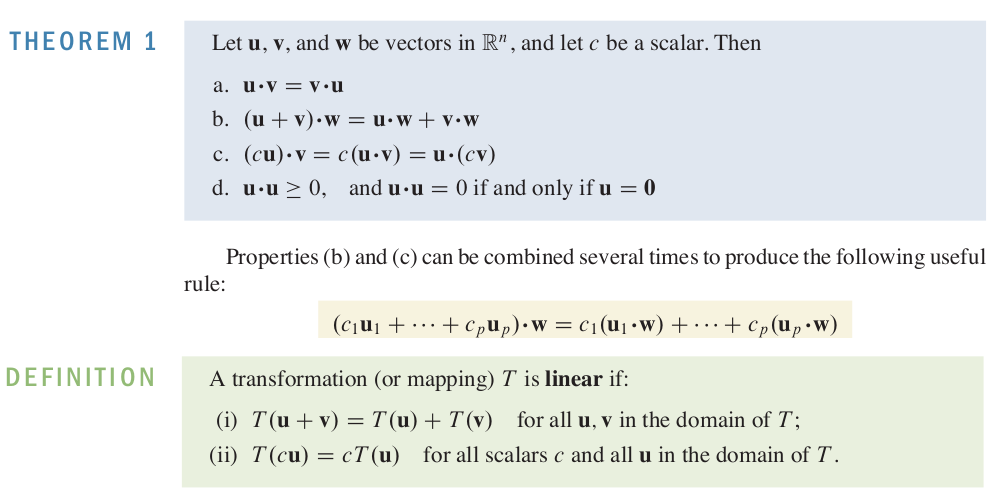
*Theorem 1, from "Linear Algebra and It's Applications" by Lay, et alia

*My question is what is the difference between an operator and a transformation.  How does this relate to dual space?

Think about how inner product collaspes a dimension...
Alright, now we can see that for the linear operator, the domain and co-domain match, however for a linear transformation, the domain and co-domain need not match. Thus, every linear operator is a linear transformation, however not every linear transformation is a linear operator.  The second question is a bit more convoluted$^*$. $_\text{*Okay, don't get me started with the puns!}$
My thoughts go to a vector mapping to $\mathbb{R}$, dual space, beinging adrift... *see Appendix 1

### 9.  Find the $ 3 \times 3$ matrices that produce the described composite 2D transformations, using homogeneous coordinates. Apply the transformations to the 'letter N' data, ``letterN.pny" and submit the corresponding plots as well.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

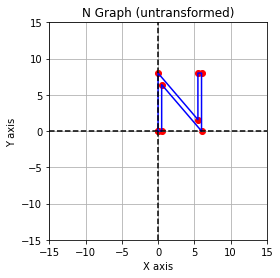

In [13]:
N = np.load('letterN.npy')

def myplot(title, N, lim=15):
    plt.title(f"{title}"); plt.xlabel("X axis"); plt.ylabel("Y axis")
    plt.scatter(N[0], N[1], color ="red")
    plt.plot(N[0], N[1], color ="blue")
    plt.xlim(-lim,lim); plt.ylim(-lim,lim)
    plt.grid(); plt.gca().set_aspect("equal") # square grids are pretty
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(0, color='black', linestyle='--')
    plt.show()
    
display(Latex("Show some information about the data we've just loaded."))
display(Latex(f'$N.shape= {N.shape}$, type(N)={type(N)}'))
display(Latex(f'$N= {sym.latex(Matrix(N))}$'))

myplot('N Graph (untransformed)', N)

#### (a) Translate by $(-2, 3)$, and then scale the $x$-coordinate by $0.8$ and the $y$-coordinate by $1.2$

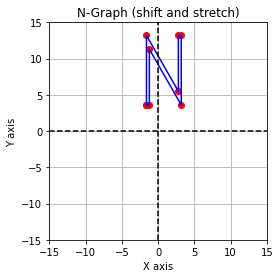

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
NN = np.asmatrix(N)  # note: N was imported above
r = np.ones(N.shape[1]) # form a new homogeneous row
NN = np.vstack([NN, r]) # append our row 

# see also: Ch2.7 P4E in Lay text
T1 = np.matrix([[1,0,-2],[0,1,3],[0,0,1]])
T2 = np.matrix([[0.8,0,0],[0,1.2,0],[0,0,1]])
T = np.dot(T2,T1)    # inner product of <T2|T1>, break out some Dirac notation
Q = np.dot(T,NN)    # inner product of <T|N>
myplot('N-Graph (shift and stretch)',np.array(Q),15)

#print(f'T = {T}')  # numpy print is ugly
display(Latex(f'$N={sym.latex(Matrix(NN))}$ *show our homogeneous data')) 
display(Latex(f'$T={sym.latex(Matrix(T2))}{sym.latex(Matrix(T1))}={sym.latex(Matrix(T))}$'))
display(Latex(f'$TN={sym.latex(Matrix(T))}{sym.latex(Matrix(NN))}$')) # so pretty
display(Latex(f'$TN={sym.latex(Matrix(Q))}$')) 

#### (b) Rotate points $\frac{\pi}{6}$, and then reflect through the $x$-axis.

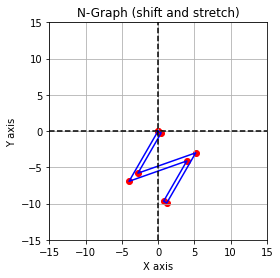

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
# use syms to make pretty
theta = sym.pi/6
T1 = Matrix([[sym.cos(theta), -sym.sin(theta),0], [sym.sin(theta), sym.cos(theta),0],[0,0,1]]) #rot
T2 = Matrix([[1,0,0],[0,-1,0],[0,0,1]]) # flip y
T= T2 * T1
Q = T*Matrix(NN) # note: NN was defined in the previous section
myplot('N-Graph (shift and stretch)',np.array(Q),15)
display(Latex(f'$T={sym.latex(Matrix(T2))}{sym.latex(Matrix(T1))}={sym.latex(Matrix(T))}$'))
display(Latex(f'$TN={sym.latex(Matrix(T))}{sym.latex(Matrix(NN))}$'))
display(Latex(f'$TN={sym.latex(Q.n(2))}$ *rounded to two decimal points')) # so pretty

### Appendix 0. The Matrix Alphabet
sym    |matrix| |sym    |matrix
------:|:-----|-|------:|:-----
A|Any Matrix|   |P|Permutation Matrix
B|Basis Matrix|   |P|Projection Matrix
C|Cofactor Matrix|   |Q|Orthogonal Matrix
D|Diagonal Matrix|   |R|Upper Triangular Matrix 
E|Elimination Matrix|   |R|Reduced Echelon Matrix
F|Fourier Matrix|   |S|Symmetric Matrix
H|Hadamard Matrix|   |T|Linear Transformation
I|Identity Matrix|   |U|Upper Triangular Matrix
J|Jordan Matrix|   |U|Left Singular Vectors
K|Stiffness Matrix|   |V|Right Singular Vectors 
L|Lower Triangular Matrix|   |X|Eigenvector Matrix
M|Markov Matrix|   |Λ|Eigenvalue Matrix
N|Nullspace Matrix|   |Σ|Singular Value Matrix

##### *Linear Algebra by Gilbert Strang

### Appendix 1Damage
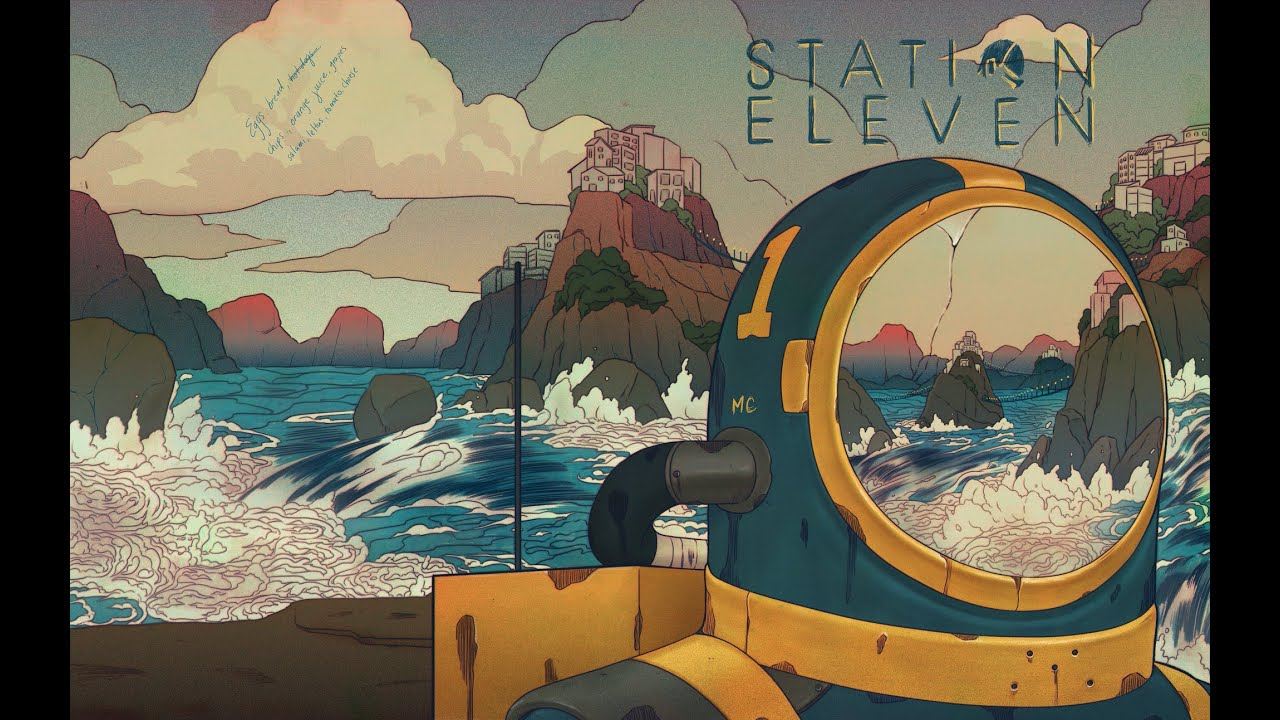
##### “I Remember Damage. And Escape. Then Adrift In A Stranger’s Galaxy For A Long Time. But I’m Safe Now. I Found It Again. My Home.”
##### *Station Eleven by Emily St. John Mandel

### Appendix 2D. quiver

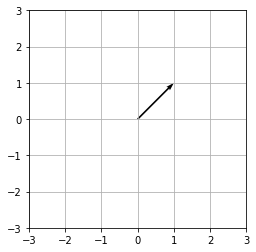

In [10]:
# 2d quiver
plt.quiver(0,0,1,1, angles='xy', scale_units='xy', scale=1)
lim = 3
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.grid()
plt.gca().set_aspect("equal") # square grids are pretty
plt.show()

### Appendix 3D. quiver

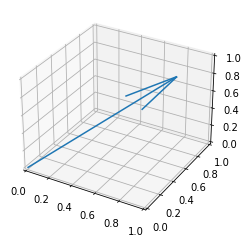

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 1)
ax.quiver(0, 0, 0, 1, 1, 1, length = sqrt(2), normalize = True)
plt.show()